### Task1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df=pd.read_csv('bikes.csv')

# 1. Make Profit Feature.

def calculate_profit(x):
    casual_customers = x['casual']
    registerd_customers = x['registered']
    registerd_price_per_hour = 5
    casual_price_per_hour = 20
    taxes= 0.14 
    maintance_per_year=1500/(12*30*24) #maintenance per hour
    profit=taxes*(casual_customers*(casual_price_per_hour+maintance_per_year)+registerd_customers*(casual_price_per_hour+maintance_per_year))
    return profit
    
df['Profit/hour'] = df[['casual', 'registered']].apply(calculate_profit, axis=1)  
df


,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit/hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,45.188889
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,112.972222
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,90.377778
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,36.715972
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.824306
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,948.966667
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,680.657639
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,474.483333
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,364.335417


(array([  45.,  207.,  865., 2114., 2942., 2566., 1475.,  538.,  115.,
          19.]),
 array([-417.29488329, -290.18493864, -163.07499398,  -35.96504933,
          91.14489532,  218.25483998,  345.36478463,  472.47472928,
         599.58467394,  726.69461859,  853.80456324]),
 <BarContainer object of 10 artists>)

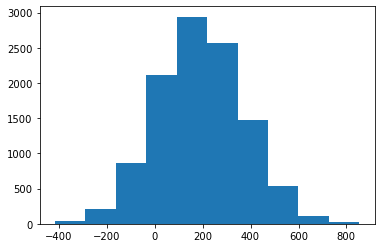

In [15]:
#2. Distribution rental_bikes_count.
rented_bikes_array=np.array(df['rented_bikes_count'])

rented_bikes_count_norm=np.random.normal(rented_bikes_array.mean(),rented_bikes_array.std(),rented_bikes_array.size)
plt.hist(rented_bikes_count_norm)

(array([  15.,  148.,  653., 1764., 2926., 2876., 1737.,  611.,  136.,
          20.]),
 array([-1316.85349545,  -944.83893314,  -572.82437084,  -200.80980853,
          171.20475378,   543.21931608,   915.23387839,  1287.2484407 ,
         1659.263003  ,  2031.27756531,  2403.29212762]),
 <BarContainer object of 10 artists>)

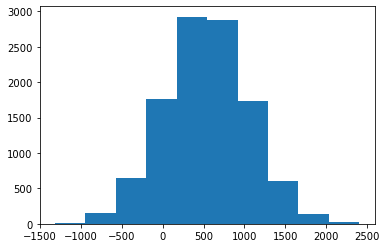

In [42]:
#2. Distribution profit.
profit_per_hour_array=np.array(df['Profit/hour'])

profit_per_hour__norm=np.random.normal(profit_per_hour_array.mean(),profit_per_hour_array.std(),profit_per_hour_array.size)
plt.hist(profit_per_hour__norm)

In [49]:
# 3. Profit for each day.

profit_per_hour_array=np.array(df['Profit/hour'])
N=24

# first cut it so that lenght of a % N is zero
rest = profit_per_hour_array.shape[0]%N
a = profit_per_hour_array[:-rest]

assert a.shape[0]%N == 0

# do the reshape
a_RS = a.reshape(-1,N)

profit_per_day_array=np.sum(a_RS,axis=1)


pd.DataFrame({'Profit/day':profit_per_day_array})

,Profit/day
0,2781.940972
1,2276.390278
2,3818.461111
3,4434.159722
4,4535.834722
...,...
448,13446.518750
449,14017.028472
450,12887.306250
451,13426.748611


In [27]:
# 4. Which season that has more registeration & profit.
Season_max=df['season'][(df['registered']==max(df['registered'])) & (df['Profit/hour']==max(df['Profit/hour']))]
print('The season that has more registeration & profit is: ',np.array(Season_max)[0])


The season that has more registeration & profit is:  Fall


In [29]:
#5. Which weather condition that has more registeration & profit.
Weather_max=df['weather'][(df['registered']==max(df['registered'])) & (df['Profit/hour']==max(df['Profit/hour']))]
print('The Weather that has more registeration & profit is: ',np.array(Weather_max)[0])

The Weather that has more registeration & profit is:  Clear


In [31]:
#6. Correlation between profit & bikes count with all features.

df[['Profit/hour','rented_bikes_count']].corr()

,Profit/hour,rented_bikes_count
Profit/hour,1.0,1.0
rented_bikes_count,1.0,1.0


In [86]:
#7. Rentals during rush hours (7-9 am & 3-5 pm(15:00-17:00)).


rented_bikes_count_array=np.array(df['rented_bikes_count'])
rush_hour_bikes_lists=[]
rush_hour_bikes=[]
rush_hour_bikes_total=[]
for n in range(int(len(rented_bikes_count_array)/24)+(len(rented_bikes_count_array)-(24*int(len(rented_bikes_count_array)/24)))):
    rush_hour_bikes_lists.append(rented_bikes_count_array[n+7:n+10])
    rush_hour_bikes_lists.append(rented_bikes_count_array[n+15:n+18])    

for n in range(len(rush_hour_bikes_lists)):
    rush_hour_bikes.append(rush_hour_bikes_lists[n])
    
for n in range(0,int(len(rush_hour_bikes)/2)+(len(rush_hour_bikes)-(2*int(len(rush_hour_bikes)/2))),2):
    rush_hour_bikes_total.append(sum(rush_hour_bikes[n])+sum(rush_hour_bikes[n+1]))    

    
    
pd.DataFrame({'rented_bikes_rush_hour':rush_hour_bikes_total})


,rented_bikes_rush_hour
0,295
1,253
2,245
3,284
4,341
...,...
229,294
230,529
231,705
232,708


In [93]:
#7. Rentals during workday & holiday.

Rentals_work_holiday=df['rented_bikes_count'][(df['workingday']==1) | (df['holiday']==1)]



pd.DataFrame({'Rentals_workday_or_holiday':Rentals_work_holiday})

,Rentals_workday_or_holiday
47,5
48,2
50,3
51,30
52,64
...,...
10881,336
10882,241
10883,168
10884,129


In [95]:
#8. Registered or casual is more.
if sum(df['registered'])>sum(df['casual']):
    print('registered is more')
else:
    print('casual is more')

registered is more


In [101]:
#9. What is the average of bikes would be registered during the week.
registered_array=np.array(df['registered'])

n=24*7
registered_weekly=[]
for i in range(0, len(registered_array), n):
     registered_weekly.append(np.mean(registered_array[i:i + n]))

registered_weekly

pd.DataFrame({'Average of who registered weekly':registered_weekly})

,Average of who registered weekly
0,50.428571
1,48.851190
2,54.398810
3,59.511905
4,71.571429
...,...
60,202.535714
61,194.809524
62,207.363095
63,192.928571


In [122]:
#10. at Schools time  (9-12) & (2-6) profit.


rented_bikes_count_array=np.array(df['rented_bikes_count'])
bikes_school_lists=[]
school_bikes=[]
bikes_school_total=[]

for n in range(int(len(rented_bikes_count_array)/24)+(len(rented_bikes_count_array)-(24*int(len(rented_bikes_count_array)/24)))):
    bikes_school_lists.append(rented_bikes_count_array[n+9:n+13])
    bikes_school_lists.append(rented_bikes_count_array[n+14:n+19])    

for n in range(len(bikes_school_lists)):
    school_bikes.append(bikes_school_lists[n])
    
for n in range(0,int(len(school_bikes)/2)+(len(school_bikes)-(2*int(len(school_bikes)/2))),2):
    bikes_school_total.append(sum(school_bikes[n])+sum(school_bikes[n+1]))    

    
    
display(pd.DataFrame({'rented_bikes_school_times/day':bikes_school_total}))
print('total rented bikes at school times is :', np.sum(bikes_school_total))



,rented_bikes_school_times/day
0,601
1,612
2,608
3,603
4,573
...,...
229,795
230,810
231,693
232,603


total rented bikes at school times is : 117044
total rented bikes at school times is : 120


In [119]:
#11. Profit in 2011 & saturdays & season fall
profit2011_sat_fall=np.sum(df['Profit/hour'].loc[0:24*356]) + np.sum(df['Profit/hour'][df['season']=='Fall']) + np.sum(df['Profit/hour'].loc[24*356::24*7])

print('Profit in 2011 & saturdays & season fall is: ',profit2011_sat_fall)

Profit in 2011 & saturdays & season fall is:  5943330.22013889


### task 2

In [106]:
#Apply data analysis on 'loan_data.csv' dataset.
#this time you should think about the right questions to ask and apply the analysis then 


df2=pd.read_csv('loan_data.csv')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [107]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000
